In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import files

sns.set(style="whitegrid")
plt.rcParams['figure.dpi'] = 110

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [2]:
uploaded = files.upload()   # choose the downloaded titanic zip file or train.csv directly


Saving titanic.zip to titanic.zip


In [3]:
import zipfile, io

for fn in uploaded.keys():
    try:
        z = zipfile.ZipFile(io.BytesIO(uploaded[fn]))
        z.extractall()
        print("Extracted:", fn)
    except zipfile.BadZipFile:
        print(fn, "is not a zip file or is corrupted (perhaps you uploaded train.csv directly).")

Extracted: titanic.zip


In [4]:
# list files in current directory and search for CSVs
for root, dirs, files_in in os.walk("."):
    for f in files_in:
        if f.lower().endswith(".csv"):
            print(os.path.join(root, f))
# If train.csv is visible, proceed. If not, upload train.csv directly using files.upload()

./train.csv
./gender_submission.csv
./test.csv
./sample_data/mnist_test.csv
./sample_data/california_housing_train.csv
./sample_data/california_housing_test.csv
./sample_data/mnist_train_small.csv


In [5]:
csv_path = "train.csv"   # change this if the csv is inside a folder or named differently
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())

print("\nInfo:")
df.info()

print("\nMissing values per column:")
display(df.isna().sum().to_frame("Missing Values"))

Shape: (891, 12)

Columns:
 ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing values per column:


,Missing Values
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('/', '_').str.lower()
df.head()


,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df_clean = df.copy()

df_clean = df_clean.drop(columns=['passengerid', 'name', 'ticket', 'cabin'])

df_clean['age'] = df_clean['age'].fillna(df_clean['age'].median())
df_clean['embarked'] = df_clean['embarked'].fillna(df_clean['embarked'].mode()[0])

display(df_clean.isna().sum().to_frame("Missing Values After Cleaning"))


,Missing Values After Cleaning
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0


In [9]:
cat_cols = ['sex','embarked','pclass']
for c in cat_cols:
    df_clean[c] = df_clean[c].astype('category')
df_clean.dtypes

,0
survived,int64
pclass,category
sex,category
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,category


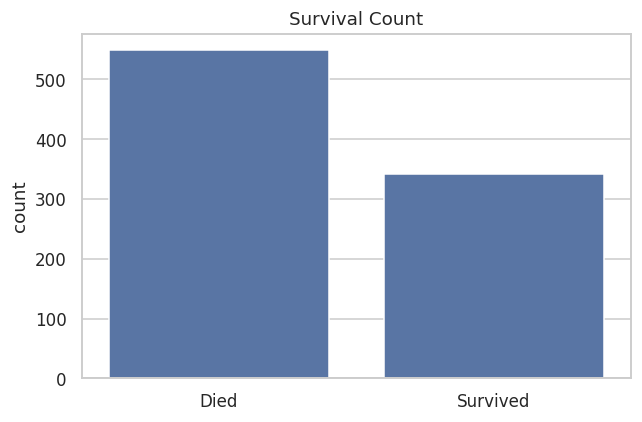

Survival percentages (%):
 survived
0    61.62
1    38.38
Name: proportion, dtype: float64


In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='survived', data=df_clean)
plt.xticks([0,1], ['Died','Survived'])
plt.title("Survival Count")
plt.xlabel("")
plt.tight_layout()
plt.show()
survived_pct = df_clean['survived'].value_counts(normalize=True).mul(100).round(2)
print("Survival percentages (%):\n", survived_pct)


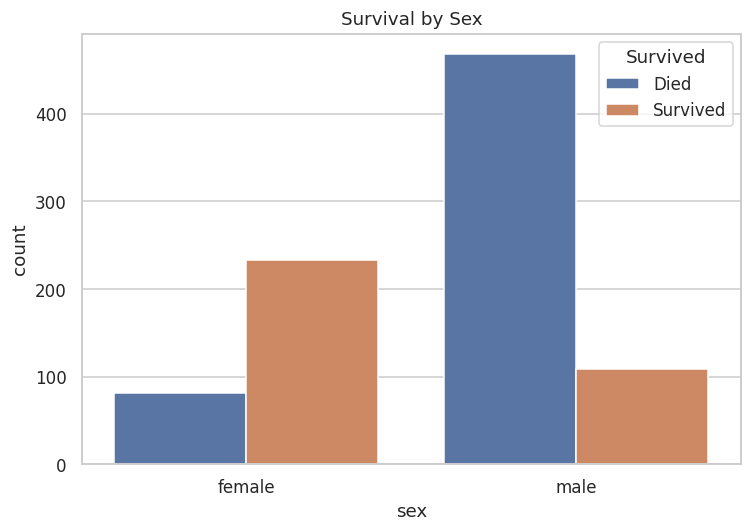

In [11]:
plt.figure(figsize=(7,5))
sns.countplot(x='sex', hue='survived', data=df_clean)
plt.title("Survival by Sex")
plt.legend(title="Survived", labels=['Died','Survived'])
plt.tight_layout()
plt.show()

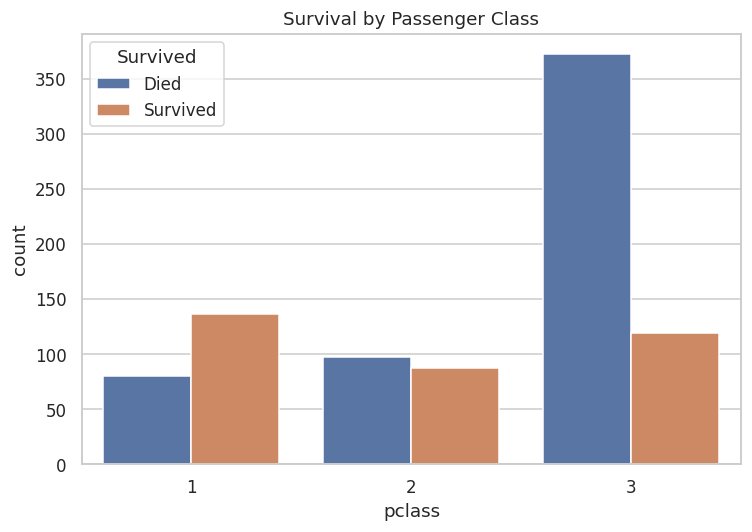

In [12]:
plt.figure(figsize=(7,5))
sns.countplot(x='pclass', hue='survived', data=df_clean, order=[1,2,3])
plt.title("Survival by Passenger Class")
plt.legend(title="Survived", labels=['Died','Survived'])
plt.tight_layout()
plt.show()

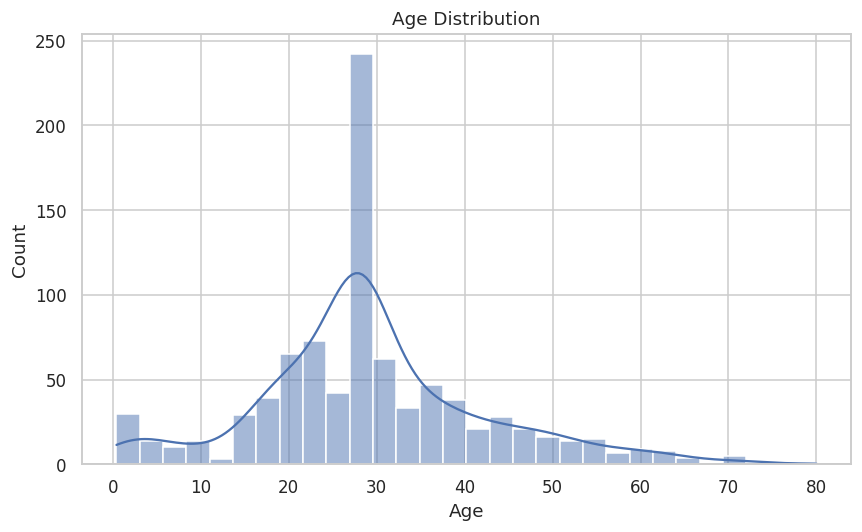

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df_clean['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.tight_layout()
plt.show()

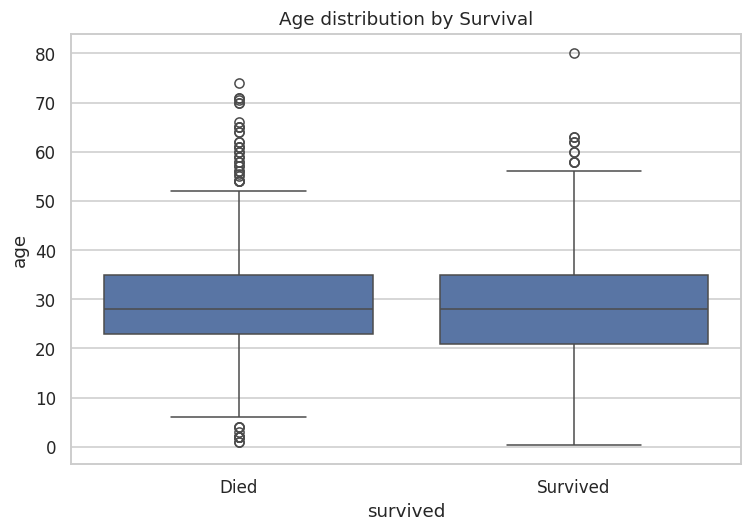

In [14]:
plt.figure(figsize=(7,5))
sns.boxplot(x='survived', y='age', data=df_clean)
plt.xticks([0,1], ['Died','Survived'])
plt.title("Age distribution by Survival")
plt.tight_layout()
plt.show()

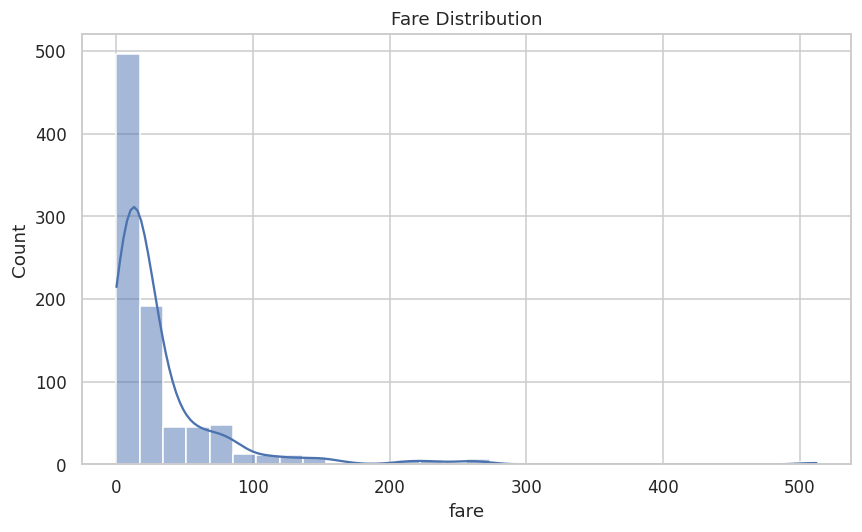

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df_clean['fare'], bins=30, kde=True)
plt.title("Fare Distribution")
plt.tight_layout()
plt.show()


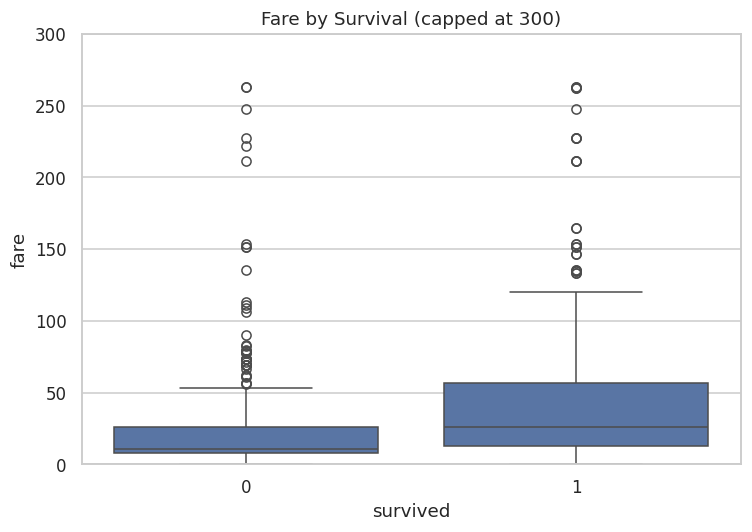

In [16]:
plt.figure(figsize=(7,5))
sns.boxplot(x='survived', y='fare', data=df_clean)
plt.ylim(0, 300)  # caps extreme fares to show pattern
plt.title("Fare by Survival (capped at 300)")
plt.tight_layout()
plt.show()

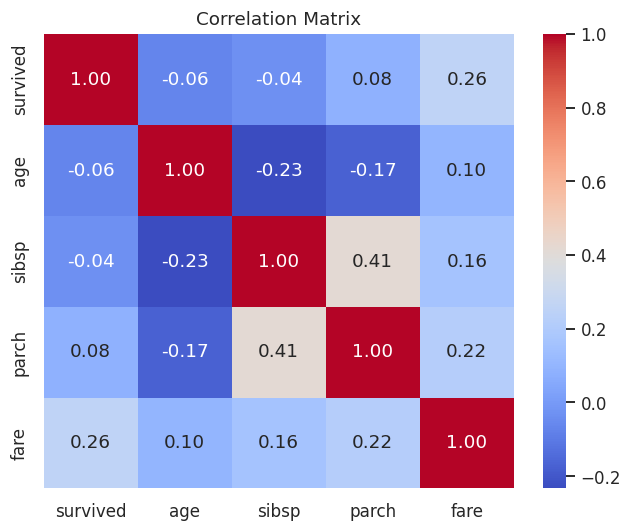

In [17]:
plt.figure(figsize=(6,5))
sns.heatmap(df_clean.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

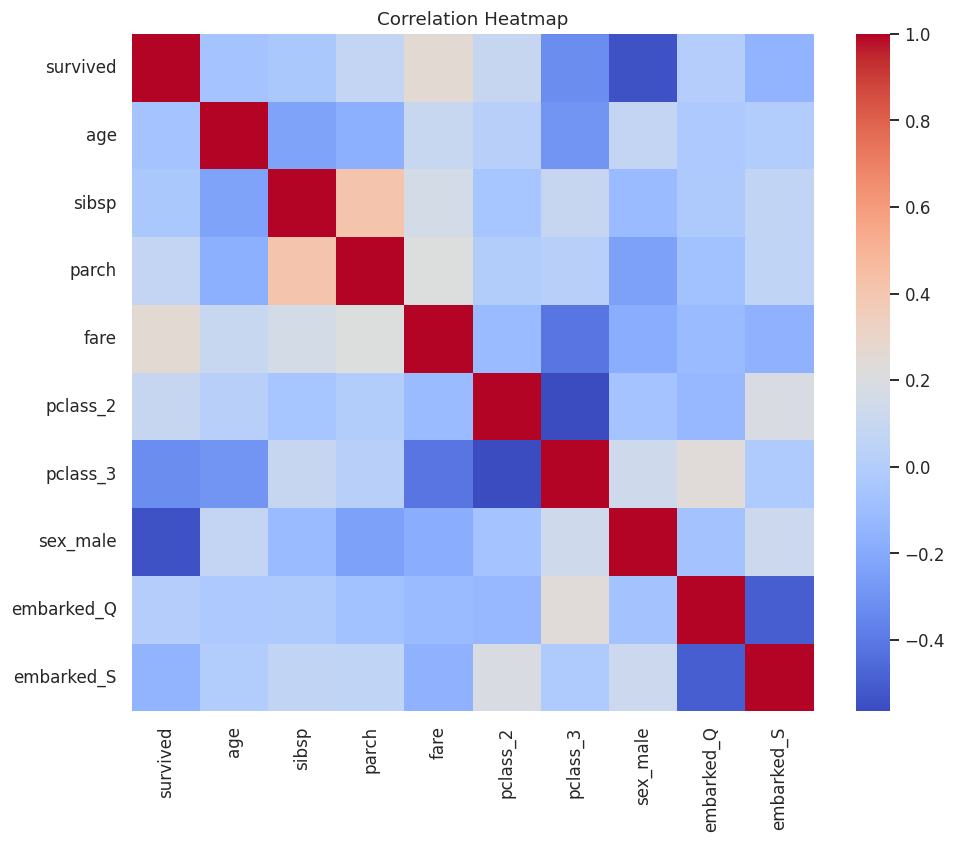

In [18]:
df_encoded = pd.get_dummies(df_clean, drop_first=True)

plt.figure(figsize=(10,8))
sns.heatmap(df_encoded.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

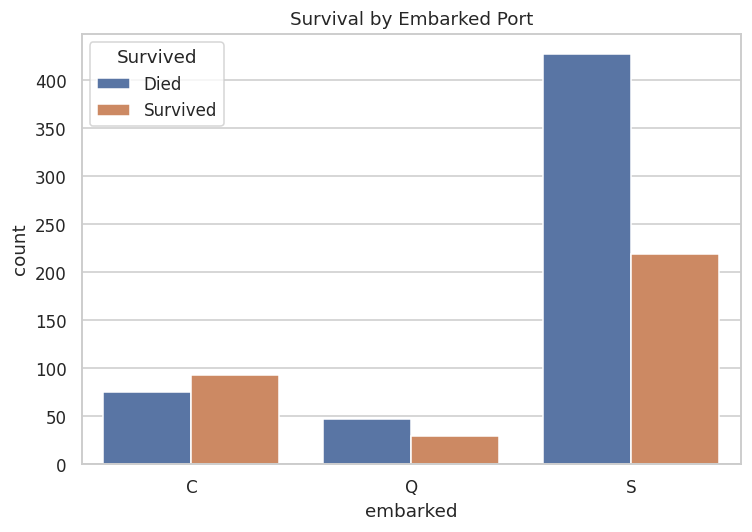

In [19]:
plt.figure(figsize=(7,5))
sns.countplot(x='embarked', hue='survived', data=df_clean)
plt.title("Survival by Embarked Port")
plt.legend(title="Survived", labels=['Died', 'Survived'])
plt.tight_layout()
plt.show()

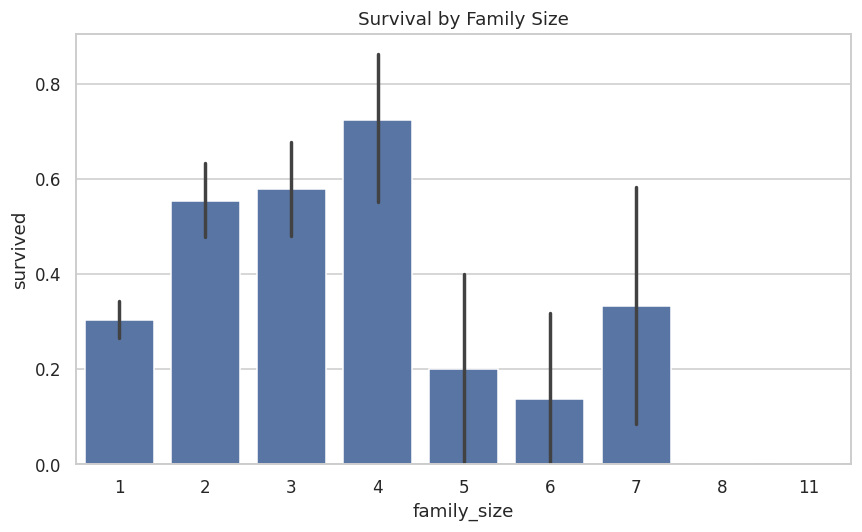

In [20]:
df_clean["family_size"] = df_clean["sibsp"] + df_clean["parch"] + 1
plt.figure(figsize=(8,5))
sns.barplot(x="family_size", y="survived", data=df_clean)
plt.title("Survival by Family Size")
plt.tight_layout()
plt.show()

In [21]:
pivot = pd.pivot_table(df_clean, values='survived', index='sex', columns='pclass', aggfunc=np.mean)
pivot = (pivot * 100).round(2)  # percent
display(pivot)

/tmp/ipython-input-213224953.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = pd.pivot_table(df_clean, values='survived', index='sex', columns='pclass', aggfunc=np.mean)
/tmp/ipython-input-213224953.py:1: FutureWarning: The provided callable <function mean at 0x7e11cbfa7880> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot = pd.pivot_table(df_clean, values='survived', index='sex', columns='pclass', aggfunc=np.mean)


pclass,1,2,3
sex,,,
female,96.81,92.11,50.00
male,36.89,15.74,13.54
